In [75]:
#Import packages 
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import os
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#10x genomics – dataset pbmc -2017
#Purified different cell populations (beads/antibodies) 
#10 different populations measured separately 
#Take these different populations and use them as classifiers 
#We want to concatenate the files together

In [3]:
#Import the data: path: /ifs/obds-training/apr20/exercises/machine_learning/data
#First just going to upload one data file to see what it looks like
Bcells = pd.read_csv('/ifs/obds-training/apr20/exercises/machine_learning/data/b_cells.gz')
Bcells

#Cells in rows, genes across top in columns
#Can see that there are 400 cells for each file in this list

,A1BG,AAAS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARSD1,AASDHPPT,...,ZNHIT3,ZNHIT6,ZNRD1,ZRANB2,ZRSR2,ZSCAN16,ZSCAN16-AS1,ZSCAN18,ZSWIM7,ZYX
0,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,9.225092,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,3.026634,0.0,0,0,0.0,0.0,0.0,0.000000,...,3.026634,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3.026634,0.0
4,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,8.503401,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,5.370569,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
396,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
397,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
398,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [6]:
#Datasets import as list 
data_sets = os.listdir("/ifs/obds-training/apr20/exercises/machine_learning/data/")
data_sets

['21_05_2020_sumeet.ipynb',
 '.ipynb_checkpoints',
 'naive_t.gz',
 'cd56_nk.gz',
 'memory_t.gz',
 'cd4_t_helper.gz',
 'cd34.gz',
 'regulatory_t.gz',
 'b_cells.gz',
 'cd14_monocytes.gz',
 'cytotoxic_t.gz',
 'naive_cytotoxic.gz']

In [7]:
#Remove Summet's notebook and the other one
data_sets2 = data_sets[2:]
data_sets2

['naive_t.gz',
 'cd56_nk.gz',
 'memory_t.gz',
 'cd4_t_helper.gz',
 'cd34.gz',
 'regulatory_t.gz',
 'b_cells.gz',
 'cd14_monocytes.gz',
 'cytotoxic_t.gz',
 'naive_cytotoxic.gz']

In [8]:
data_list = [pd.read_csv(file) for file in data_sets2]
#Use a list to use a for loop to read files in and store throguh the list

In [9]:
data_list #Shows you the 10 files as dataframes/arrays in the list 

[         A1BG      AAAS  AAED1  AAGAB  AAK1  AAMDC  AAMP      AAR2    AARSD1  \
 0    0.000000  7.722008    0.0    0.0   0.0    0.0   0.0  7.722008  0.000000   
 1    0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 2    0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 3    8.488964  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  8.488964   
 4    0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 ..        ...       ...    ...    ...   ...    ...   ...       ...       ...   
 395  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 396  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 397  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 398  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 399  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 
      AASDHPPT  ...  ZNHIT

In [23]:
#convert into a dataframe by concantenating the data (gives 10 filesx400cells as one)
all_data = pd.concat(data_list) 

In [60]:
#Make a variable to give an identifier of where the cell came from for downstream plotting/ highlight which cells are which
#data_set2 contains the list - repeat this 400 times
data_sets3 = np.repeat(data_sets2,400)
data_sets3 #Dont want this in the data, just want it for the plotting to use as values

array(['naive_t.gz', 'naive_t.gz', 'naive_t.gz', ...,
       'naive_cytotoxic.gz', 'naive_cytotoxic.gz', 'naive_cytotoxic.gz'],
      dtype='<U18')

In [61]:
#Run UMAP #doesnt work with pd dataframe(have to add.values) Use umap with 20 neighbours to get lower dim for plotting
umap_instance = UMAP(n_neighbors = 20)
umap_transformed = umap_instance.fit_transform(all_data.values) #all data is the concatenated data

TypeError: 'AxesSubplot' object is not callable

In [62]:
#convert to a dataframe to allow plotting 
data_frame = pd.DataFrame(umap_transformed)
data_frame
#0 and 1 are the names of the columns

,0,1
0,14.903373,11.564177
1,15.240469,12.034364
2,16.162083,11.212975
3,16.389845,11.603710
4,15.782292,10.743991
...,...,...
3995,16.095236,8.241583
3996,16.441441,8.380456
3997,16.445082,8.811270
3998,15.689223,8.054678


In [66]:
#Add column to dataframe to give it labels - identifier from origin file the samples came from 
data_frame['labels']=data_sets3
data_frame

,0,1,labels
0,14.903373,11.564177,naive_t.gz
1,15.240469,12.034364,naive_t.gz
2,16.162083,11.212975,naive_t.gz
3,16.389845,11.603710,naive_t.gz
4,15.782292,10.743991,naive_t.gz
...,...,...,...
3995,16.095236,8.241583,naive_cytotoxic.gz
3996,16.441441,8.380456,naive_cytotoxic.gz
3997,16.445082,8.811270,naive_cytotoxic.gz
3998,15.689223,8.054678,naive_cytotoxic.gz


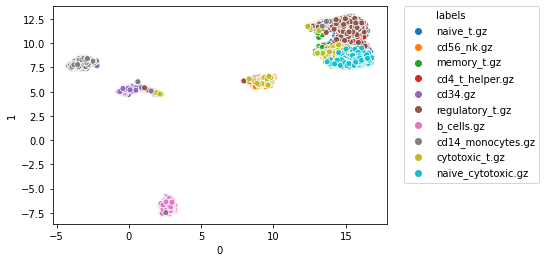

In [67]:
#Run this using hue='labels' to colour the clusters by identity
UMAP = sns.scatterplot(data = data_frame, x=0, y=1, hue='labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Plot outside legend of the figure

UMAP


In [70]:
#Split data into train and test and run decision tree
#Use “from sklearn.model_selection import train_test_split”
#Split the data and the labels into 0.25 test data 
#all_data contains the data from all 10 files, data_sets3 is the labels 
#Can set the randomness 

data_train, data_test, labels_train, labels_test = train_test_split(all_data, data_sets3, test_size = 0.25)


In [73]:
labels_train

array(['cd14_monocytes.gz', 'memory_t.gz', 'cytotoxic_t.gz', ...,
       'cd34.gz', 'naive_t.gz', 'cd14_monocytes.gz'], dtype='<U18')

In [76]:
#Train the decisions tree classfiier
#initialises
clf = DecisionTreeClassifier() #creates classifier from sklearn
#train on training data
clf = clf.fit(data_train, labels_train) #creates rules for the different types to identify


In [77]:
#Now want a score of how well the model is performing. This gives you how many times (68% correct)
clf.score(data_test, labels_test)

0.684

In [78]:
#See how much overfitting by looking at how it fits 
clf.score(data_train, labels_train)

1.0

In [ ]:
#Test on the 
clf.predict(data_test) #gives pr